## **2.1 Data Preprocessing & Cleaning**

**Upload the CSV**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


**Install and Import Libraries**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

**Load and Assign Column Names**

In [8]:
cols = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv('heart_disease.csv', header=None, names=cols)

# Replace '?' with NaN and convert to numeric
df = df.replace('?', pd.NA).apply(pd.to_numeric, errors='coerce')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Handle Missing Values**

In [9]:
print("Missing values per column:\n", df.isna().sum())

# Option 1 (drop rows)
df = df.dropna().reset_index(drop=True)

# Option 2 (impute)
# num_imp = SimpleImputer(strategy='median')
# df[df.columns] = num_imp.fit_transform(df)

df.info()

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memo

**one-hot encoding for categorical variables**

In [10]:
cat_cols = ['cp', 'thal', 'slope']          # nominal categories
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,thal_6.0,thal_7.0,slope_2.0,slope_3.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0,False,False,False,True,False,False,True
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,3.0,2,False,False,True,False,False,True,False
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,False,False,True,False,True,True,False
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0,False,True,False,False,False,False,True
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0,True,False,False,False,False,False,False


**Exploratory Data Analysis (EDA)**

(Histograms, Boxplots, Heatmap)

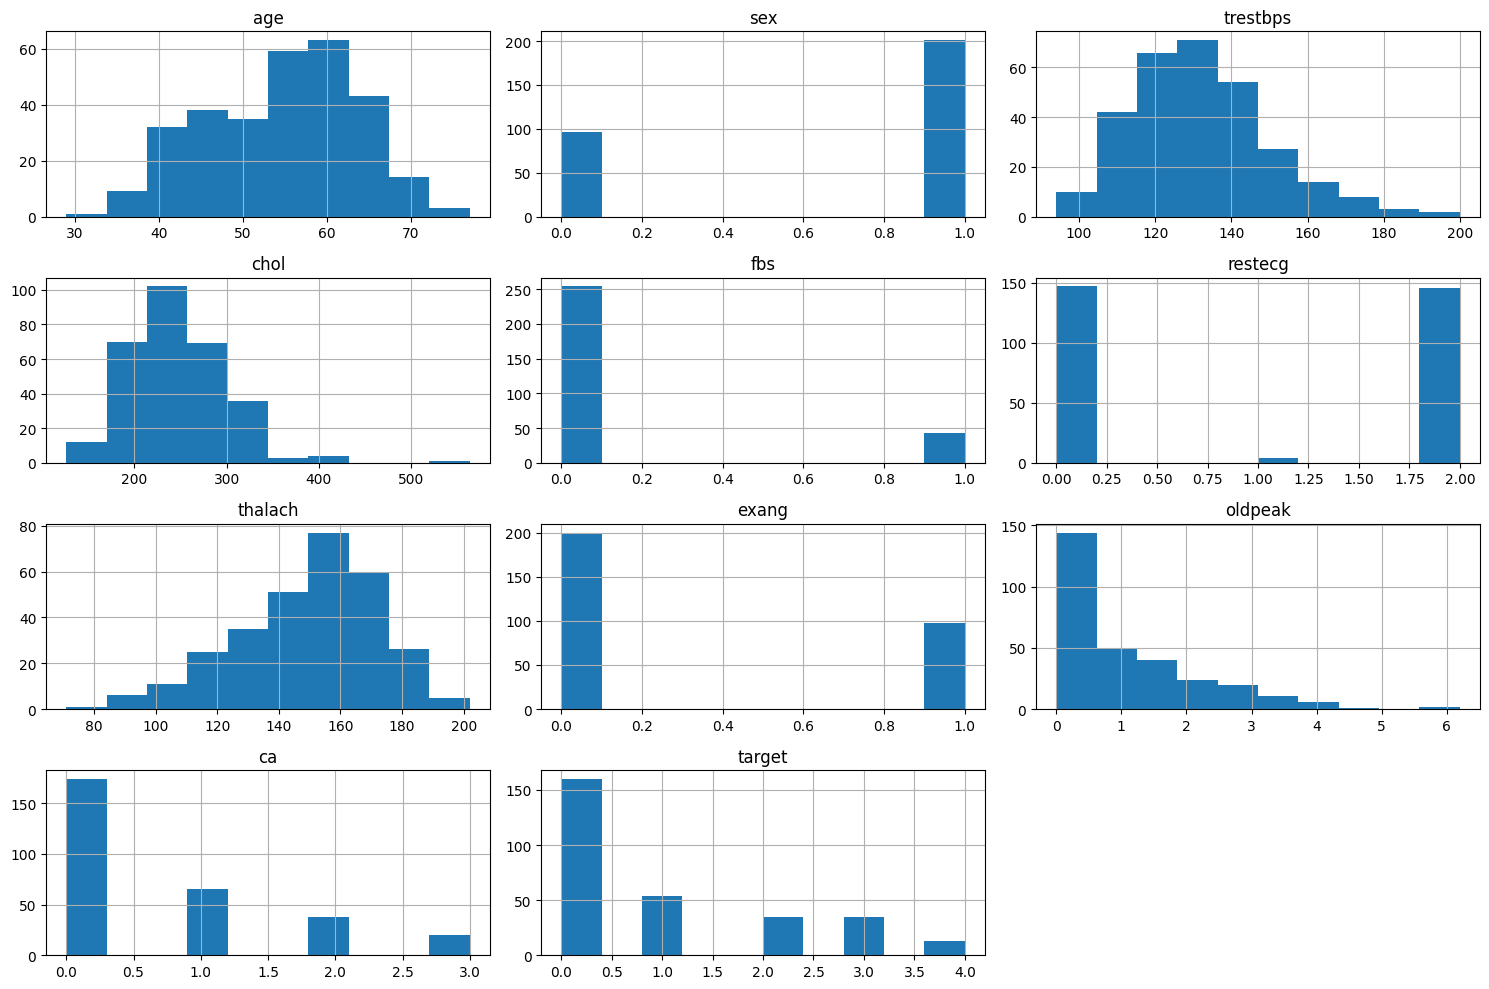

In [11]:
# Histograms
df.hist(figsize=(15, 10))
plt.tight_layout(); plt.show()

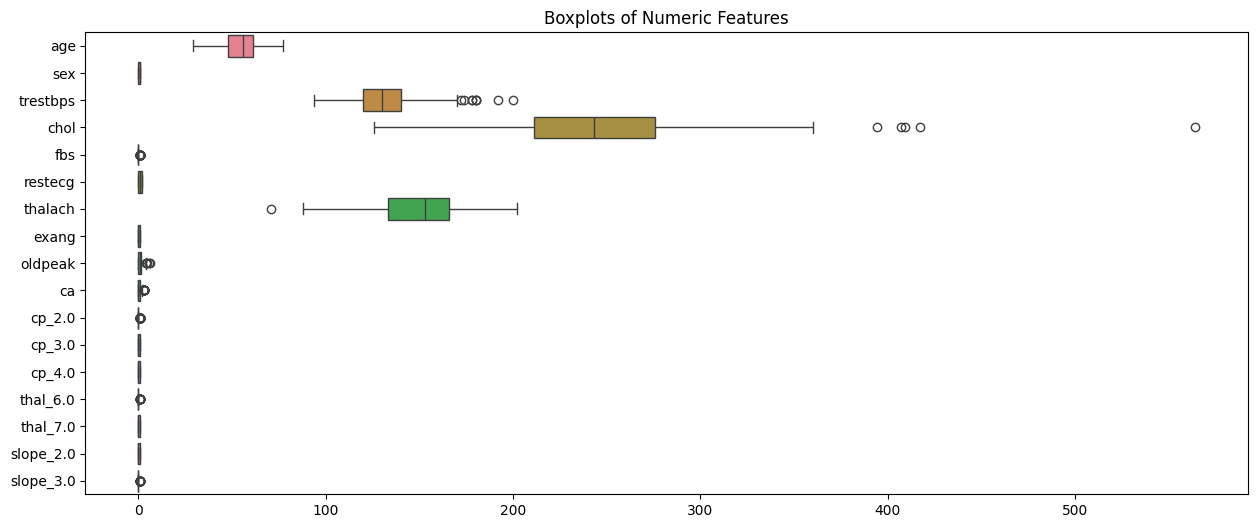

In [12]:
# Boxplots for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.drop(columns='target'), orient='h')
plt.title('Boxplots of Numeric Features')
plt.show()

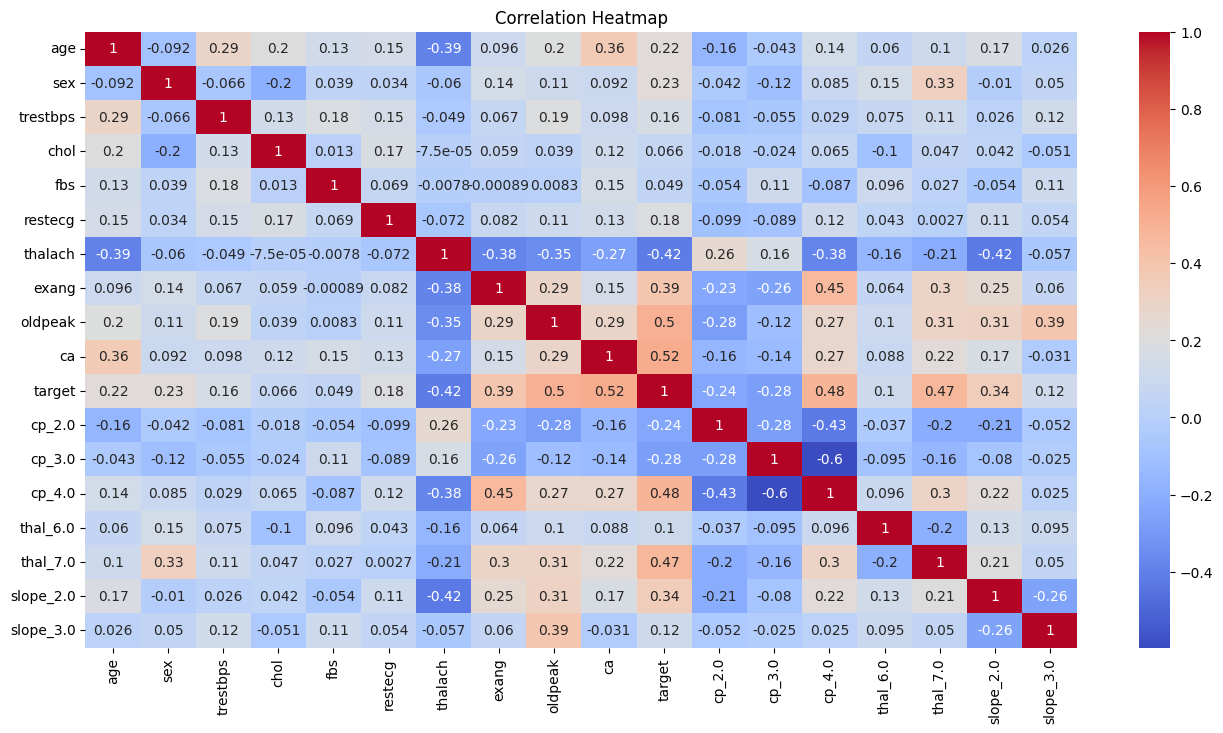

In [15]:
# Correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Feature Scaling (Standardization)**

In [16]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,thal_6.0,thal_7.0,slope_2.0,slope_3.0
0,0.936181,0.691095,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,-0.721976,-0.444500,-0.622776,-0.957146,3.937004,-0.794901,-0.925338,3.625308
1,1.378929,0.691095,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,2.478425,-0.444500,-0.622776,1.044772,-0.254000,-0.794901,1.080686,-0.275839
2,1.378929,0.691095,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,1.411625,-0.444500,-0.622776,1.044772,-0.254000,1.258018,1.080686,-0.275839
3,-1.941680,0.691095,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,-0.721976,-0.444500,1.605713,-0.957146,-0.254000,-0.794901,-0.925338,3.625308
4,-1.498933,-1.446980,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.721976,2.249717,-0.622776,-0.957146,-0.254000,-0.794901,-0.925338,-0.275839


### **✅ Deliverable**

* `df`        – raw cleaned & encoded DataFrame  
* `X_scaled_df` – standardized features ready for modeling  
* `y`          – target labels  

**Next step:** 2.2 Dimensionality Reduction – PCA
